# Tutorial 8: Numerical Integration and 2D gradient

During this tutorial we will learn how to compute integrals numerically using the well-known trapezoidal and Simpson's rules. We will also learn how to compute the gradient of a 2D image and use it to detect edges.

In [98]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scienceplots as scplt
from PIL import Image

## 1. Numerical Integration: Computing the valance electrons in silicon.
In this exercise, we will compute the integral of a function using the trapezoidal rule and Simpson's rule.  So, for the aforementioned activity we will use the `dos_si.dat` file. This file stores the density of states (DOS) of silicon as a function of energy. The first column is the energy in eV and the second column is the DOS in arbitrary units. The DOS is a function that describes the number of states per unit energy interval that are available to be occupied by electrons in a solid. To compute the total number of valance electrons in silicon, we need to compute the following integral:

$$N = \int_{-\infty}^{E_F} DOS(\varepsilon) d\varepsilon$$

where $N$ is the total number of valance electrons in silicon and $E_F$ is the Fermi energy.

To complete this exercise, you need to:

1. Create a function that reads the `dos_si.dat` file and returns the Fermi energy, the energy and DOS values.
2. Call the your function and get the Fermi energy, the energy and DOS values.
3. Generate a high quality plot of with the energy in the x-axis and the DOS in the y-axis. Include the Fermi energy in the plot.
4. Create a function that takes as inputs the Fermi energy, the energy and DOS values and returns the slice of the DOS from $-\infty$ to $E_F$ known as the valance band.
5. Compute the integral of the DOS from $-\infty$ to $E_F$ using the trapezoidal rule and Simpson's rule.
5. Compare the results of the trapezoidal and Simpson's rules with the exact value (valance electrons in silicon).

In [99]:
# Define the function to read the data
def read_dos(filename):
    """ 
    This function reads the dos_si.dat file and returns the 
    Fermi energy, the energy levels and the density of states

    Parameters:
                filename: (str) -The name of the file to be read
    Returns:
                fermi : (float)    - The Fermi energy
                energy: (np.array) - The energy levels
                dos   : (np.array) - The density of states
    """

    # Read the file 
    data = pd.read_csv(filename, sep='\s+', header=None)

    # Extract the Fermi energy
    fermi = data.iloc[0, 2]

    # Extract the energy levels
    energy = data.iloc[1:, 0].astype(float)

    # Extract the density of states
    dos = data.iloc[1:, 1].astype(float)

    return fermi, energy, dos

In [100]:
# Call the function to read the data
filename = './data/dos_si.dat'

fermi, energy, dos = read_dos(filename)

In [101]:
# Check the data
print(fermi)
#print(energy)
#print(dos)

-5.7583


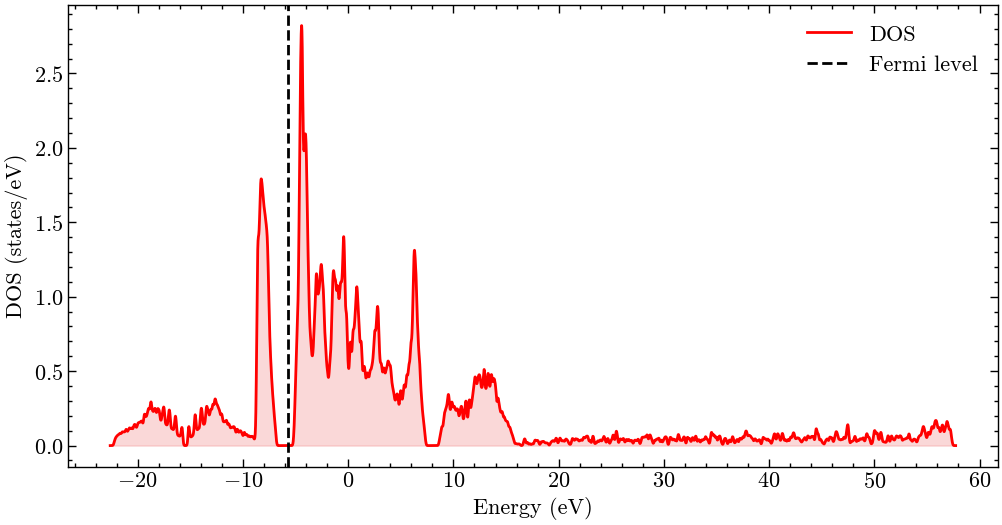

In [102]:
# Plot the DOS
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.plot(energy, dos, color='red', label='DOS')
    plt.fill_between(energy, dos, color='lightcoral', alpha=0.3)
    plt.axvline(fermi, color='black', linestyle='--', label='Fermi level')
    plt.xlabel('Energy (eV)')
    plt.ylabel('DOS (states/eV)')
    plt.legend()
    plt.show()

In [103]:
# Define the function to slice the DOS data
def slice_dos(fermi, energy, dos):
    """ 
    This function slices the DOS data and returns the DOS data for 
    the valence band.

    Parameters:
                fermi  : (float)    - The Fermi energy
                energy : (np.array) - The energy levels
                dos    : (np.array) - The density of states
    Returns:
                e_val  : (np.array) - The energy levels for the valence band
                dos_val: (np.array) - The density of states for the valence band
    """
    # Slice the DOS data for the valence band
    e_val = energy[energy < fermi]
    dos_val = dos[energy < fermi]

    return e_val, dos_val

In [104]:
# Call the function to slice the DOS data
e_val, dos_val = slice_dos(fermi, energy, dos)

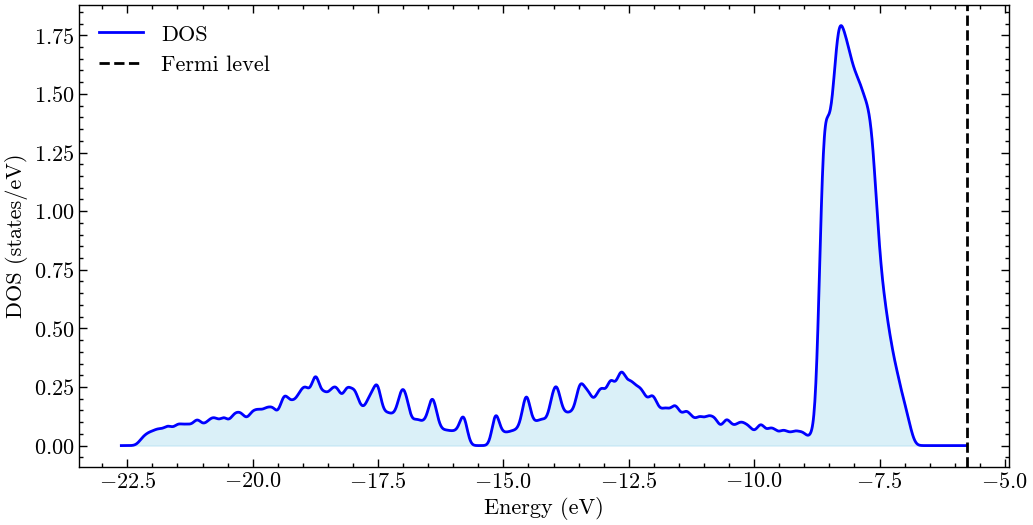

In [105]:
# Plot the DOS for the valence band
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.plot(e_val, dos_val, color='blue', label='DOS')
    plt.fill_between(e_val, dos_val, color='skyblue', alpha=0.3)
    plt.axvline(fermi, color='black', linestyle='--', label='Fermi level')
    plt.xlabel('Energy (eV)')
    plt.ylabel('DOS (states/eV)')
    plt.legend()
    plt.show()

In [106]:
# Now, compute the integral of the DOS function using the trapezoidal rule and simpson's rule
n_electrons_trapz = sp.integrate.trapz(dos_val, e_val)
n_electrons_simps = sp.integrate.simpson(dos_val, e_val)

# Print the number of electrons
print('Number of electrons using the trapezoidal rule:', n_electrons_trapz)
print('Number of electrons using Simpson\'s rule:', n_electrons_simps)

Number of electrons using the trapezoidal rule: 3.99999855725575
Number of electrons using Simpson's rule: 3.999998559654311


In [107]:
# Compute the error in the number of electrons
error_trapz = abs(n_electrons_trapz - 4)
error_simps = abs(n_electrons_simps - 4)

# Print the error in the number of electrons
print('Error in the number of electrons using the trapezoidal rule:', error_trapz)
print('Error in the number of electrons using Simpson\'s rule:', error_simps)

Error in the number of electrons using the trapezoidal rule: 1.4427442498465837e-06
Error in the number of electrons using Simpson's rule: 1.440345688941136e-06


We can see that both integration methods are very close to the exact value. The Simpson's rule has a smaller error than the trapezoidal rule. This is because the Simpson's rule uses a quadratic polynomial to approximate the function, while the trapezoidal rule uses a straight line.

## 2. 2D Gradient: Edge Detection
Edge detection is a prime tool in multiple image processing applications such as medical imaging, quality control, and computer vision. 
One way to detect edges is by computing the gradient of an image. The gradient of an image is a vector that points in the direction of the greatest rate of change in intensity. The magnitude of the gradient is the rate of change in intensity in that direction. Edges in an image correspond to high values of the gradient magnitude.

For this exercise, we will use an image of stem cells. https://www.fredhutch.org/en/news/releases/2019/07/targeting-subset-stem-cells-shows-gene-editing-blood-cells.html. The cells will undergo a CRISPR gene-editing process. Our goal is to segment the cells from the background. To do this, we will compute the gradient of the image and use it to detect the edges of the cells.

To complete this exercise, you need to:

1. Create a function that reads the image and returns the image as a 2D numpy array.
2. Call the your function and read the stem cells image in the channel of your choice, then generate a plot of the image.
4. Create a function that takes as input the image array and returns its gradient and the magnitude of the gradient.
5. Plot the gradient of the image.
5. Define a criteria to detect the edges of the cells in the image, i.e., the pixels with high gradient magnitude. Then define a function that takes as input the image and the gradient magnitude and returns a binary image where the pixels with high gradient magnitude are set to 1 and the rest to 0.
6. Generate a two-panel plot with the original image in one panel and the edge-detected image in the other panel.


In [108]:
# Define the function to read the image and return the indicated channel
def read_image(filename, channel):
    """ 
    This function reads the .tif image file and returns the 
    image data

    Parameters:
                filename: (str) -The name of the file to be read
    Returns:
                image: (np.array) - The image data
    """

    # Read the file 
    image = Image.open(filename)

    # select the channel
    image = image.getchannel(channel)

    # Convert the image to a numpy array
    image = np.array(image)

    return image

In [109]:
# Call the function to read the image data
filename = './data/stem-cells.jpg'

image = read_image(filename, 2)

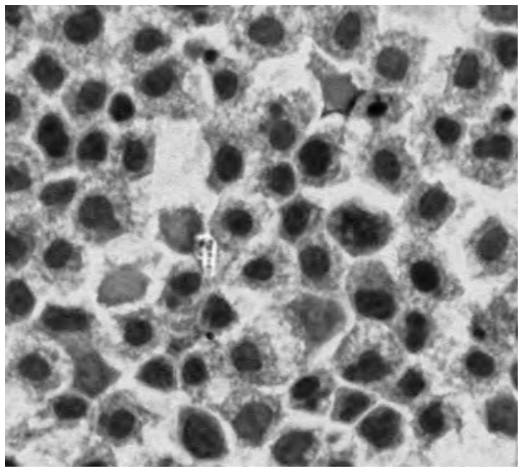

In [110]:
# Plot the image
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [111]:
# Compute the gradient of the image
def gradient(image, dx):
    """
    This function computes the gradient of an image
    using the numpy gradient function.

    Parameters:
                scalar: (np.array) - Image array
                dx    : (float)    - The spacing between the points
    Returns:
                grad_vec: (np.array) - The gradient of the image
                mag_grad_vec: (np.array) - The magnitude of the gradient of the image

    """

    # Compute the gradient of the image
    grad_image = np.gradient(image, dx)

    # Compute the magnitude of the gradient
    mag_grad_image = np.sqrt(grad_image[0]**2 + grad_image[1]**2)

    return grad_image, mag_grad_image

In [112]:
# Call the function to compute the gradient of the image and the magnitude of the gradient
dx = 1

grad_image, mag_grad_image = gradient(image, dx)

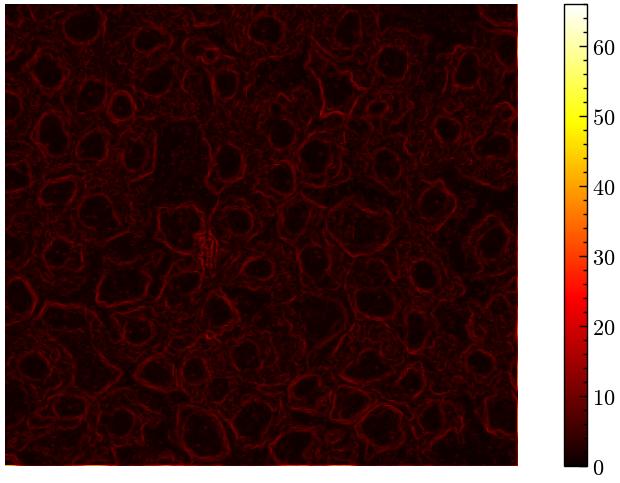

In [113]:
# Plot the gradient of the image
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.imshow(mag_grad_image, cmap='hot')
    plt.axis('off')
    plt.colorbar()
    plt.show()

In [114]:
# Write a function to detect the edges in the image
def edge_detection(image, mag_grad_image):
    """
    This function detects the edges in an image using the gradient of the image.

    Parameters:
                image        : (np.array) - Image array
                image_grad   : (np.array) - The gradient of the image
                mag_grad_image: (np.array) - The magnitude of the gradient of the image
    Returns:
                edge_image: (np.array) - The edge detected image
    """

    # Compute the max of mag_grad_image/image
    max_image = np.max(mag_grad_image / image)

    # Set the threshold
    threshold = 0.03 * max_image

    # Detect the edges in the image
    edges_image = np.where((mag_grad_image/image) >= threshold, 1, np.nan)

    return edges_image

In [115]:
# Call the function to detect the edges in the image
edges_image = edge_detection(image, mag_grad_image)

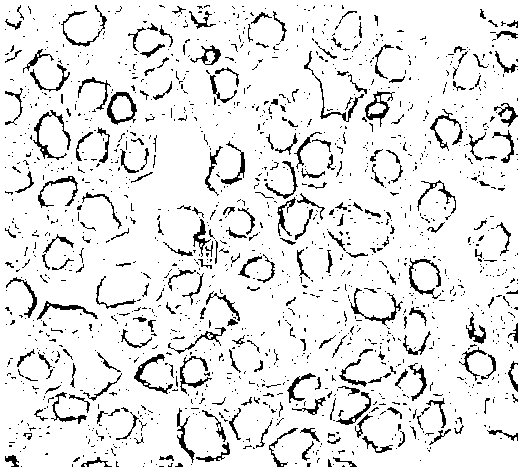

In [116]:
# Plot the edge detected image
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.imshow(edges_image, cmap='gray')
    plt.axis('off')
    plt.show()

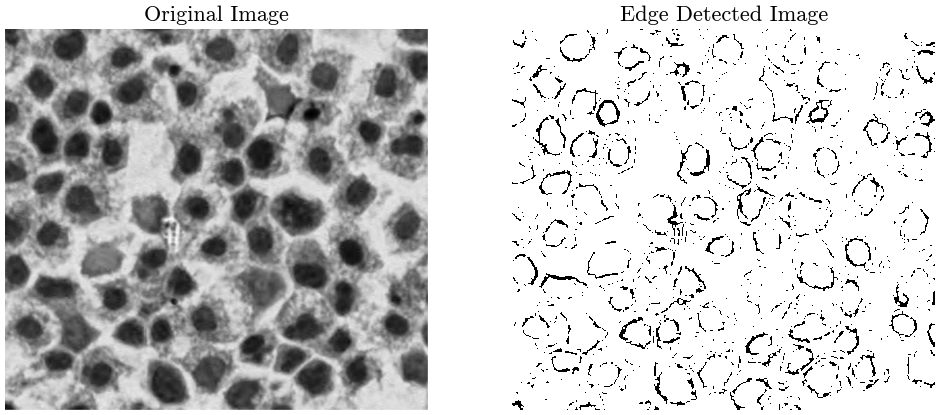

In [117]:
# Make a two panel plot of the original image and the edge detected image
with plt.style.context(['science', 'notebook', 'no-latex']):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Original Image')
    ax[1].imshow(edges_image, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Edge Detected Image')
    plt.show()

# 3. Fourier Analysis: Denoising a signal 
In this exercise, we will learn how to denoise a signal and get the frequency components of the signal using the Fourier transform. To do so, we will use the signal.dat file, which contains a noisy signal. The first column is the time in seconds and the second column is amplitude of the signal at each time. Your task is the following:

1. Create a function that reads the `signal.dat` file and returns two numpy arrays containing the time and the amplitude respectively.
2. Call your function and make a high quality plot of the signal.
3. Create a function that receives as parameters the time vector and the signal amplitude. Then compute the Fourier transform and returns the Fourier power and the respective frequencies.
4. Make a high quality plot of the outputs. How many prominent peaks can you see? What do the non-zero frequency peaks represent? 
5. Now, define a condition (threshold) to remove all the frequencies that may be realted to noise in the signal. Explain your reasoning and report the results in a high quality plot. How many frequencies contribute to the actual signal? 
6. Reconstruct de signal, i.e, perform the inverse Fourier transform on the denoised signal, and report your result in a plot.

In [118]:
# Create a function to read the signal.dat file 
def read_signal(filename):
    """ 
    This function reads the signal.dat file 

    Parameters:

                filename : (str) - Name of the file (path)

    Returns:  
                time: (np.array) - Time array 
                amplitude: (np.array) - Amplitude array
    """
    # read the file
    data = pd.read_csv(filename, sep = "\t")

    # get time and amplitude array
    time      = np.array(data["time [s]"])
    amplitude = np.array(data["amplitude [m]"])

    return time, amplitude

In [119]:
# call the function 
time, amplitude = read_signal("./data/signal.dat")

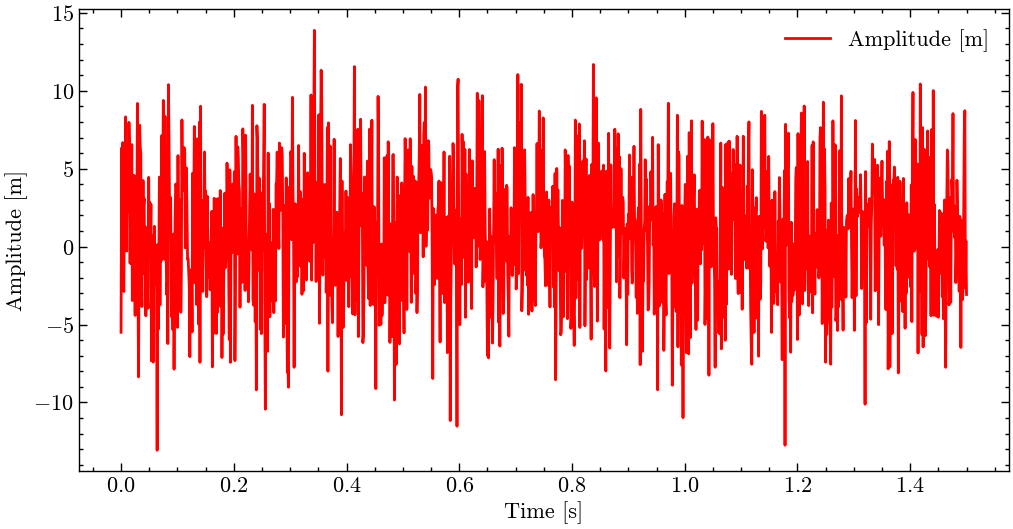

In [120]:
# Plot the signal 
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.plot(time, amplitude, color='red', label='Amplitude [m]')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude [m]')
    plt.legend()
    plt.show()

In [121]:
# Create a function to compute the FFT of the signal 
def signal_fft(time, signal):
    """ 
    Function to compute the FFT of a signal

    Parameters:
                time  : (np.array) - Time array
                signal: (np.array) - Amplitude array 

    Returns:   
                f_power: (np.array) - Fourier power array
                freqs  : (np.array) - Frequancies array 
    """
    # FFT
    f_transform = np.fft.fft(signal)
    n = len(f_transform)
    
    # F power 
    f_power = np.abs(f_transform)**2 

    # freqs
    freqs = np.fft.fftfreq(n, time[1] - time[0])

    return  f_transform ,f_power, freqs

In [122]:
# Call the function
f_transform ,f_power, freqs = signal_fft(time, amplitude)

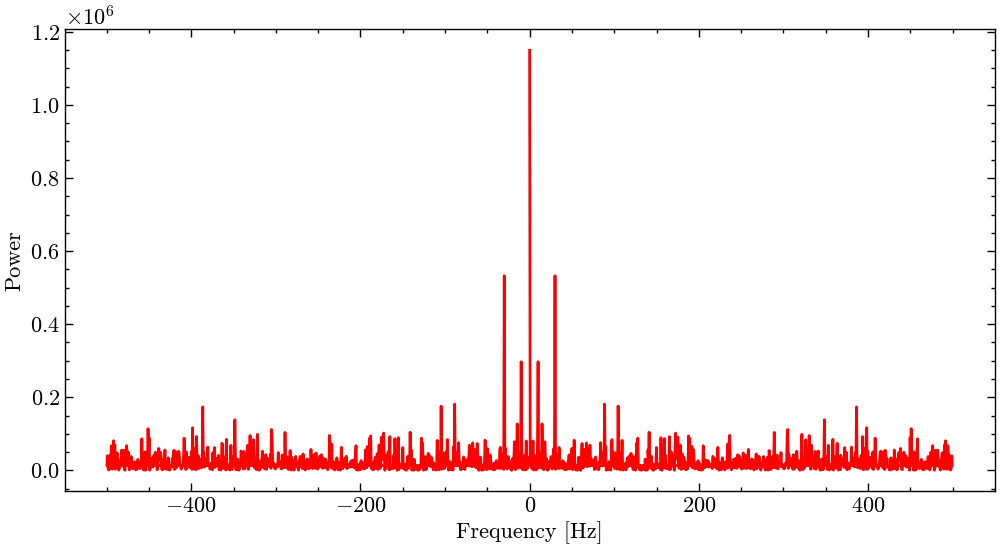

In [123]:
# Plot the results
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, f_power, color='red')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power')
    plt.show()

#### Do not forget to answer the questions 

Now, we need to clean the signal. Let's choose the three prominent non-zero ferquencies for this analysis. Therefore, our threshold must take into account those freqs. 

In [124]:
# Now, let's clean the signal.
threshold = 0.2 * 1e6

In [125]:
# remove the noise
clean_f_power = np.where(f_power > threshold, f_power, 0)
clean_f_transform = np.where(f_power > threshold, f_transform, 0)


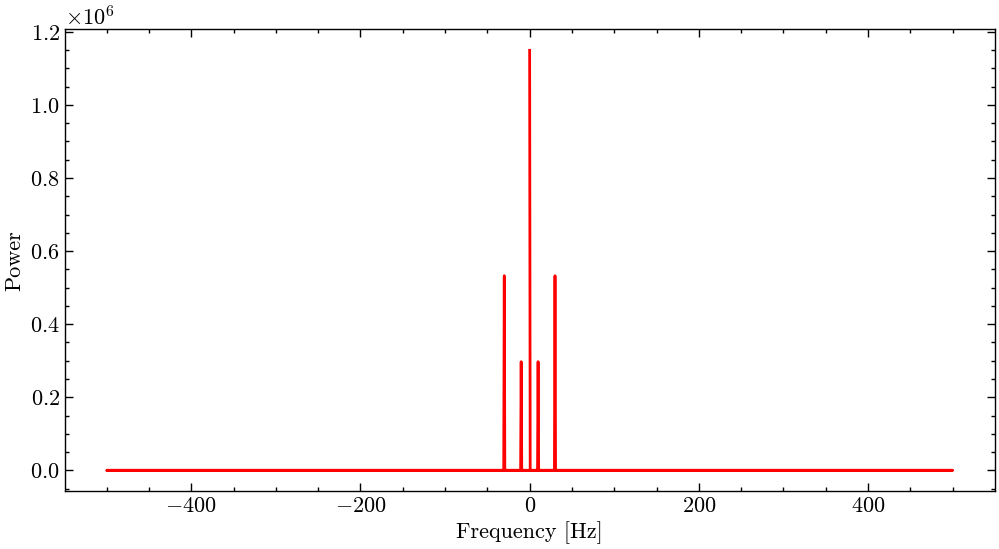

In [126]:
# plot the cleaned signal
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, clean_f_power, color='red')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power')
    plt.show()

In [127]:
# Write a function to perform the inverse FFT
clean_signal = np.fft.ifft(clean_f_transform)

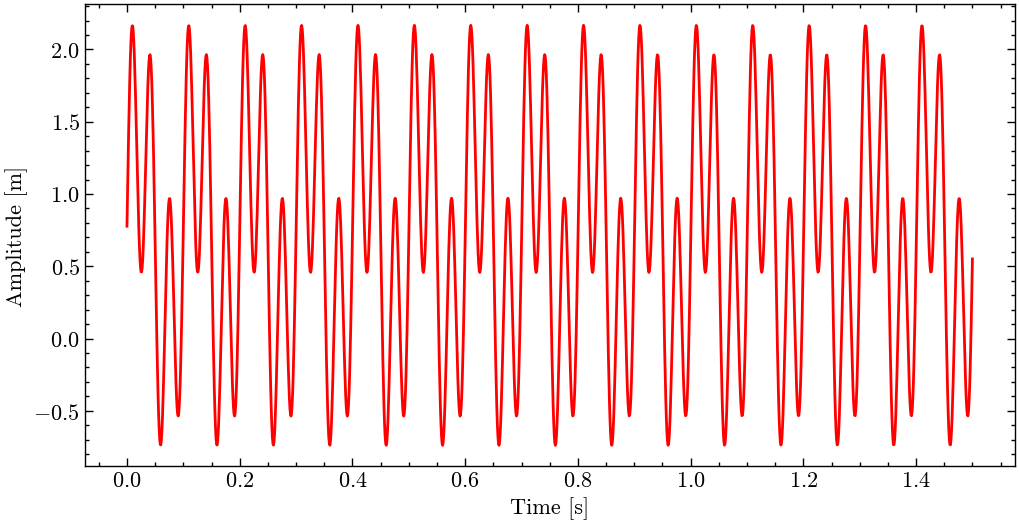

In [128]:
# Plot the clean signal 
with plt.style.context(['science', 'notebook', 'no-latex']):
    plt.figure(figsize=(12, 6))
    plt.plot(time, clean_signal.real, color='red')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude [m]')
    plt.show()

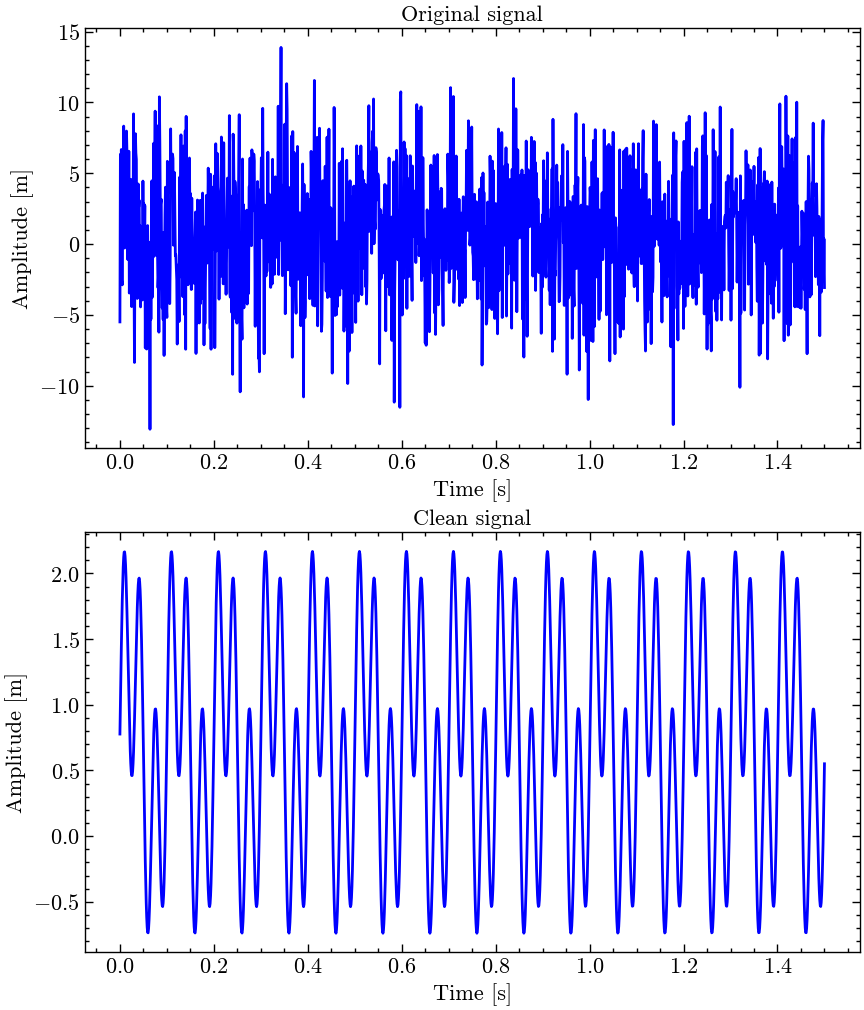

In [129]:
with plt.style.context(['science', 'notebook', 'no-latex']):
    fig, ax = plt.subplots(2, 1, figsize = (10, 12))
    ax[0].plot(time, amplitude, color='blue', label='Amplitude [m]')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('Amplitude [m]')
    ax[0].set_title('Original signal')

    ax[1].plot(time, clean_signal.real, color='blue', label='Amplitude [m]')
    ax[1].set_xlabel('Time [s]')
    ax[1].set_ylabel('Amplitude [m]')
    ax[1].set_title('Clean signal')

    plt.show()
